In [11]:
using Interpolations
using DelimitedFiles
using Cubature
using Plots
using LaTeXStrings

In [12]:
kpk = readdlm("test_pk.txt", comments=true)
pk_itp = interpolate((kpk[:,1],), kpk[:,2], Gridded(Linear()));

In [13]:
b = 2
f = 0.7
pk2d = (μ, k) -> (b + μ^2*f)^2*pk_itp(k)

#23 (generic function with 1 method)

In [14]:
kp = (k, μ, αV, ϵ) -> k*sqrt(αV^2*ϵ*μ^2 + αV^2/ϵ^2*(1 - μ^2))
μp = (k, μ, αV, ϵ) -> μ*αV*sqrt(ϵ)/sqrt(αV^2*ϵ*μ^2 + αV^2/ϵ^2*(1 - μ^2))

#27 (generic function with 1 method)

In [28]:
L0 = x -> 1
L2 = x -> (3*x^2 - 1)/2
L4 = x -> (35*x^4 - 30*x^2 + 3)/8

#77 (generic function with 1 method)

In [16]:
function pkprime(kgrid, weight, αV, ϵ)
    Nk = size(kgrid)[1]
    pp = zeros(Nk)
    for i in 1:Nk
        pp[i] = hquadrature(x -> pk2d(μp(kgrid[i], x, αV, ϵ), kp(kgrid[i], x, αV, ϵ))*weight(μp(kgrid[i], x, αV, ϵ)), -1, 1, reltol=1e-4)[1]
    end
    return pp
end

pkprime (generic function with 1 method)

In [41]:
Nk = size(kgrid)[1]
dk = kgrid[2] - kgrid[1]
p0k = zeros(Nk)
dp0 = zeros(Nk)
p2k = zeros(Nk)
dp2 = zeros(Nk)
p4k = zeros(Nk)
dp4 = zeros(Nk)
for i in 1:Nk
    p0k[i] = hquadrature(x -> pk2d(x, kgrid[i])/2, -1, 1, reltol=1e-4)[1]
    p2k[i] = hquadrature(x -> pk2d(x, kgrid[i])*(3*x^2-1)/2*5/2, -1, 1, reltol=1e-4)[1]
    p4k[i] = hquadrature(x -> pk2d(x, kgrid[i])*(35*x^2-30*x+3)/8*9/2, -1, 1, reltol=1e-4)[1]
end
for i in 2:Nk
    dp0[i] = (p0k[i] - p0k[i-1])/ dk * kgrid[i]
    dp2[i] = (p2k[i] - p2k[i-1])/ dk * kgrid[i]
    dp4[i] = (p4k[i] - p4k[i-1])/ dk * kgrid[i]
end

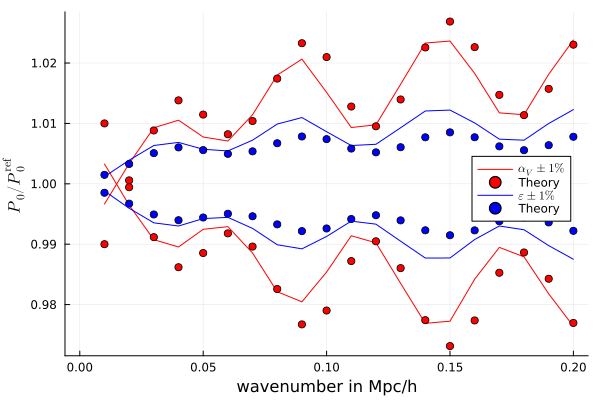

In [48]:
kgrid = collect(range(0.00, 0.20, step=0.01))
αV = 1.00
ϵ = 1.00
p0ref = pkprime(kgrid, L0, αV, ϵ)
p2ref = pkprime(kgrid, L2, αV, ϵ)
p4ref = pkprime(kgrid, L4, αV, ϵ)
αV = 1.01
ϵ = 1.00
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
p0th = p0k + p2k*(-0.795)*(ϵ-1) + dp2/sqrt(5)*(ϵ-1) + dp0*(αV-1)
plot(kgrid, p0./p0ref, color=:red, label=L"\alpha_V \pm 1\%")
plot!(kgrid, p0th./p0k, color=:red, seriestype=:scatter, label="Theory")
αV = 0.99
ϵ = 1.00
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
p0th = p0k + p2k*(-0.795)*(ϵ-1) + dp2/sqrt(5)*(ϵ-1) + dp0*(αV-1)
plot!(kgrid, p0./p0ref, color=:red, label=:none)
plot!(kgrid, p0th./p0k, color=:red, seriestype=:scatter, label=:none)
αV = 1.00
ϵ = 1.01
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
p0th = p0k + p2k*(-0.795)*(ϵ-1) + dp2/sqrt(5)*(ϵ-1) + dp0*(αV-1)
plot!(kgrid, p0./p0ref, color=:blue, label=L"\epsilon \pm 1\%")
plot!(kgrid, p0th./p0k, color=:blue, seriestype=:scatter, label="Theory")
αV = 1.00
ϵ = 0.99
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
p0th = p0k + p2k*(-0.795)*(ϵ-1) + dp2/sqrt(5)*(ϵ-1) + dp0*(αV-1)
plot!(kgrid, p0./p0ref, color=:blue, label=:none, legend=:right)
plot!(kgrid, p0th./p0k, color=:blue, seriestype=:scatter, label=:none)
plot!(xlabel="wavenumber in Mpc/h", ylabel=L"P_0/P^\mathrm{ref}_0")